# Heatmaps

Heatmaps are a great way to visualize data. They are particularly useful when you need to understand the distribution of data across two dimensions. 
In this notebook, we will use the `mplsoccer` to create heatmaps of player actions.

In [5]:
# Lets first get our data
import pandas as pd
from statsbombpy import sb

df = sb.events(match_id=3869685)

/Users/mckayjohns/miniforge3/envs/complete-football-analytics/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [6]:
# Now lets prep our data for the heatmap
# Let's look at the columns in the dataframe to filter to only what we want
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [11]:
# If we look at the value_counts of the type column, we can see that there are plenty of different types of events
# Lets filter the dataframe to only include passes
# While we are only interested in passes, you can use the following code to filter to any event type or to create a heatmap around any other event you are interested in
df.type.value_counts().head(10)

type
Pass              1263
Ball Receipt*     1114
Carry              940
Pressure           361
Ball Recovery      115
Duel                98
Dribble             54
Block               50
Foul Committed      48
Clearance           45
Name: count, dtype: int64

In [12]:
df = df[df['type'] == 'Pass']

In [26]:
# We also need to split the location, pass_end_location column into two columns to get our x and y coordinates
df[['x', 'y']] = df['location'].apply(pd.Series)

/var/folders/l3/wlgnl3zd5hl46kfjq1yh3k9r0000gn/T/ipykernel_12881/1158339486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['x', 'y']] = df['location'].apply(pd.Series)


In [18]:
# We also want to filter just to include successful passes
print(df['pass_outcome'].head(50))

# Statsbomb leaves a pass_outcome of NaN for successful passes and will tell you the outcome of the pass if it was unsuccessful
df = df[df['pass_outcome'].isna()]

12             NaN
13             Out
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27      Incomplete
28             NaN
29             NaN
30         Unknown
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
37      Incomplete
38             NaN
39             NaN
40    Pass Offside
41             NaN
42             NaN
43             NaN
44             NaN
45         Unknown
46             NaN
47             NaN
48             NaN
49             NaN
50      Incomplete
51      Incomplete
52             NaN
53             NaN
54             NaN
55             NaN
56             NaN
57             NaN
58      Incomplete
59             NaN
60             NaN
61      Incomplete
Name: pass_outcome, dtype: object


Text(0.5, 1.0, 'Argentina Staring Pass Locations vs France')

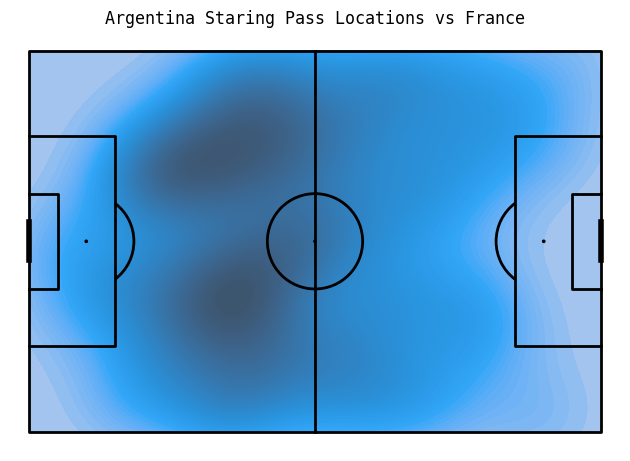

In [54]:
# Now that we only have the successful passes, let's create a heatmap for just Argentina's passes
from mplsoccer import Pitch

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

fig, ax = pitch.draw()

# filter a temporary dataframe to just include Argentina's passes
# Argentina's team_id is 779
# France's team_id is 771
df_arg = df[df['team_id'] == 779]

# Create a heatmap
# All this is doing is creating a wrapper around seaborn's kdeplot
kde = pitch.kdeplot(
    df_arg.x,
    df_arg.y,
    fill=True, # This will fill the heatmap with color even if there are no events
    thresh=0,
    n_levels=100, # This adjusts the smoothness of the heatmap. The higher the number, the smoother the heatmap will be
    cut=10,
    ax=ax
)

# Let's add a title
ax.set_title('Argentina Staring Pass Locations vs France', fontfamily='monospace')


Text(0.5, 1.0, 'France Staring Pass Locations vs Argentina')

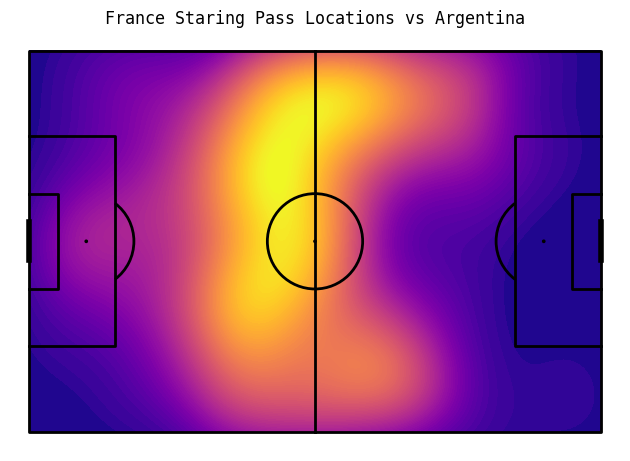

In [51]:
# Now let's create a heatmap for France's passes
fig, ax = pitch.draw()

# filter a temporary dataframe to just include France's passes
df_fra = df[df['team_id'] == 771]

# Create a heatmap
kde = pitch.kdeplot(
    df_fra.x,
    df_fra.y,
    fill=True,
    thresh=0,
    n_levels=100,
    cut=10,
    ax=ax,
    cmap='plasma' # change the color of the heatmap. You can use any of the colormaps from matplotlib. Try 'cividis' or 'plasma'
)

# Let's add a title
ax.set_title('France Staring Pass Locations vs Argentina', fontfamily='monospace')